In [3]:
import os 
import csv 
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as sts
import numpy as np
#import gmaps
import requests
from citipy import citipy

In [4]:
#Open Wine File 
csv_path = 'Resources/winemag-data.csv'

In [5]:
#Read wine data 
wine_data_pd = pd.read_csv(csv_path)

#Cleaning Data 
#droping wines with missing values in 'price', 'region_1','designation','points','price','title','description','variety'
clean_data_pd = wine_data_pd.drop(['taster_name', 'taster_twitter_handle'], axis=1)
clean_data_pd = clean_data_pd.dropna(subset=['price', 'region_1','designation','points','price','title','description','variety'])
clean_data_pd

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
...,...,...,...,...,...,...,...,...,...,...,...,...
129959,129959,France,The granite soil of the Brand Grand Cru vineya...,Brand Grand Cru,90,57.0,Alsace,Alsace,NaN,Cave de Turckheim 2010 Brand Grand Cru Pinot G...,Pinot Gris,Cave de Turckheim
129962,129962,Italy,"Blackberry, cassis, grilled herb and toasted a...",Sàgana Tenuta San Giacomo,90,40.0,Sicily & Sardinia,Sicilia,NaN,Cusumano 2012 Sàgana Tenuta San Giacomo Nero d...,Nero d'Avola,Cusumano
129965,129965,France,"While it's rich, this beautiful dry wine also ...",Seppi Landmann Vallée Noble,90,28.0,Alsace,Alsace,NaN,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser


In [6]:
#We want to compare original data to cleaned data - to ensure we didnt skew the results 
#by too much so we can use a .describe() to view a summary statistics table
wine_data_pd.describe().drop(['Unnamed: 0'], axis=1)

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
#Compare clean data statistics to old data statistics
clean_data_pd.describe().drop(['Unnamed: 0'], axis=1)

,points,price
count,70175.000000,70175.000000
mean,88.806341,39.559017
std,3.061324,35.729358
min,80.000000,4.000000
25%,87.000000,20.000000
50%,89.000000,30.000000
75%,91.000000,49.000000
max,100.000000,2013.000000



We can see that there was not too much change in the statistical data of our new DF as compared to our OG. Minor differences include standard deviation of price is lower, and our percentiles have shifted upwards by a couple of dollars in price. Lastly the largest difference is the max price of our data leaving us with a less expensive wine at 2,013 vs 3300 dollars in our original data.

In [8]:
blended_wines = clean_data_pd.dropna()

In [9]:
#find data of wine with only 1 region - typically considered a non_blended wine
non_blended = clean_data_pd[clean_data_pd['region_2'].isnull()]

In [10]:
clean_data_pd["price"].max()

2013.0

The r-squared is : 0.2138253489337102


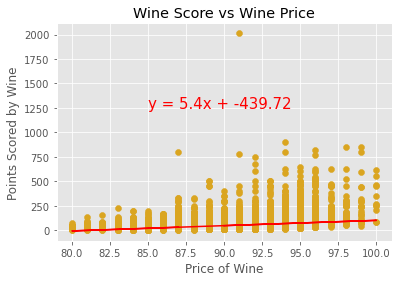

In [11]:
#create a scatter plot to view relationship between wine score and wine price
x_values = clean_data_pd["points"]
y_values = clean_data_pd["price"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.style.use('ggplot')
plt.scatter(x_values,y_values,facecolor='goldenrod')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(85,1250), fontsize=15, color="red")
plt.title("Wine Score vs Wine Price")
plt.xlabel("Price of Wine")
plt.ylabel("Points Scored by Wine")
print(f"The r-squared is : {rvalue**2}")


It seems that there is no relationship between wine score and wine price. We can see the rvalue measures around 21% when we do a linear regression. Because of this data, we can conclude that a higher price point doesn't directly mean the quality and rating of the wine is going to be higher. You can also see that the graph plots quite a few 100 point-scoring-wines at a fairly low price point.

In [12]:
#create bins for wine scores:
# 95-100 Classic: a great wine
# 90-94 Outstanding: a wine of superior character and style
# 85-89 Very good: a wine with special qualities
# 80-84 Good: a solid, well-made wine
# 75-79 Mediocre: a drinkable wine that may have minor flaws
# 50-74 Not recommended

bins = [0,75,79,84,89,94,100]
group_names = ["50-74 Not recommended","75-79 Mediocre: a drinkable wine that may have minor flaws","80-84 Good: a solid, well-made wine","85-89 Very good: a wine with special qualities","90-94 Outstanding: a wine of superior character and style","95-100 Classic: a great wine"]


clean_data_pd["Wine Score"] =pd.cut(clean_data_pd["points"],bins, labels=group_names, include_lowest=True)
wine_score_bins = clean_data_pd.groupby("Wine Score").count()
wine_score_bins

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
Wine Score,,,,,,,,,,,,
50-74 Not recommended,0,0,0,0,0,0,0,0,0,0,0,0
75-79 Mediocre: a drinkable wine that may have minor flaws,0,0,0,0,0,0,0,0,0,0,0,0
"80-84 Good: a solid, well-made wine",5642,5642,5642,5642,5642,5642,5642,5642,2523,5642,5642,5642
85-89 Very good: a wine with special qualities,34565,34565,34565,34565,34565,34565,34565,34565,15285,34565,34565,34565
90-94 Outstanding: a wine of superior character and style,28416,28416,28416,28416,28416,28416,28416,28416,15425,28416,28416,28416
95-100 Classic: a great wine,1552,1552,1552,1552,1552,1552,1552,1552,851,1552,1552,1552


In [13]:

clean_data_pd["points"].min()

80

19563      80
86711      80
86712      80
14343      80
14342      80
         ... 
345       100
39286     100
118058    100
45781     100
111754    100
Name: points, Length: 70175, dtype: int64

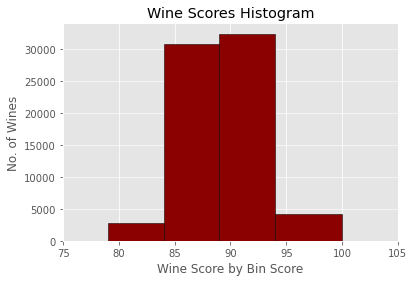

In [14]:
x = clean_data_pd["points"]
score_min = clean_data_pd["points"].min()

plt.style.use('ggplot')
plt.hist(x, bins =(bins),facecolor='darkred',edgecolor='black')
plt.grid(axis='y', alpha=0.75)
plt.xlim(75,105)
plt.xlabel('Wine Score by Bin Score')
plt.ylabel('No. of Wines')
plt.title('Wine Scores Histogram')
x.sort_values()

In [15]:
#Filter data by US data only so we can run a weather API for rainfall in US regions
us_data = clean_data_pd.dropna()
us_data = us_data[us_data['country']=='US']
us_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,Wine Score
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85-89 Very good: a wine with special qualities
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,85-89 Very good: a wine with special qualities
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,85-89 Very good: a wine with special qualities
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,85-89 Very good: a wine with special qualities
33,33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,85-89 Very good: a wine with special qualities


In [16]:
#Drop all columns with NaN to find most exact locaton for region_2
us_data = clean_data_pd.dropna()
#us_data = us_data[us_data['country']=='US']

#Showing overview of data
us_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,Wine Score
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,85-89 Very good: a wine with special qualities
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,85-89 Very good: a wine with special qualities
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,85-89 Very good: a wine with special qualities
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,85-89 Very good: a wine with special qualities
33,33,US,"Rustic and dry, this has flavors of berries, c...",Puma Springs Vineyard,86,50.0,California,Dry Creek Valley,Sonoma,Envolve 2010 Puma Springs Vineyard Red (Dry Cr...,Red Blend,Envolve,85-89 Very good: a wine with special qualities


In [17]:
#Finding the average score for each winery 
grouped_wine = us_data.groupby('winery')

#Finding the the province of each winery
province_wine = pd.DataFrame(grouped_wine['region_2'].unique())

#Finding the which wine comes from each country 
country_wine = pd.DataFrame(grouped_wine['country'].unique())

#Finding the average of the price 
mean_wine = pd.DataFrame(grouped_wine['price'].mean())

#Merging the dataframes
wine_pd = pd.merge(province_wine, country_wine, on = 'winery')

#Merging the tables together 
wine_pd = pd.merge(wine_pd, mean_wine, on = 'winery')

#Resetting the Index
wine_pd = wine_pd.reset_index()

#Setting Province as a string 
wine_pd['region_2'] = wine_pd['region_2'].str[0]

#Setting Country as a string 
wine_pd['country'] = wine_pd['country'].str[0]

In [18]:
#Displaying the Data Frame 
wine_pd.head()

,winery,region_2,country,price
0,10 Knots,Central Coast,US,28.000000
1,100 Percent Wine,California Other,US,18.000000
2,1000 Stories,California Other,US,19.000000
3,12C Wines,Napa,US,92.600000
4,14 Hands,Columbia Valley,US,20.897436


In [19]:
#Finding the wrost 200 wineries amongst the dataset
worst_us_wineries = wine_pd.nsmallest(200, 'price', keep = 'last')

#Displaying the 200 wrost wineries 
worst_us_wineries.count()

winery      200
region_2    200
country     200
price       200
dtype: int64

In [20]:
#Finding the best 200 wineries amongst the dataset 
best_us_wineries = wine_pd.nlargest(200, 'price', keep = 'last')

#Displaying the 50 wrost wineries 
best_us_wineries.head()

,winery,region_2,country,price
3655,Yao Ming,Napa,US,625.000000
3440,Verité,Sonoma,US,373.333333
1737,Kapcsandy Family Winery,Napa,US,325.000000
1577,Hundred Acre,Napa,US,300.000000
164,Araujo,Napa,US,275.000000


In [28]:
#Setting region_2 to a new variable 
region_2 = best_us_wineries['region_2']

#Setting country to a new variable 
country = best_us_wineries['country']

#Zipping together region_2 and country 
location = zip(region_2, country)

#Setting lat, lng, and city_list a list
lat = []
lng = []
city_list = []

#Api_key
api_key = '60e215774ff7488ca4cd61a66ece95a0' 

region_2

3655               Napa
3440             Sonoma
1737               Napa
1577               Napa
164                Napa
             ...       
1020               Napa
1007      Central Coast
957     Columbia Valley
792              Sonoma
656     Columbia Valley
Name: region_2, Length: 200, dtype: object

In [29]:
#Making a for loop to find the the latitude and longitude of each city in which the winery is located 
for location in location: 
    url = (f'https://api.opencagedata.com/geocode/v1/json?q={location[0]}%2C%20{location[1]}&key={api_key}')
    response = requests.get(url)
    cordinate_data = response.json()

    #Appending the lat and long to their list 
    lat.append(cordinate_data['results'][0]['geometry']['lat'])
    lng.append(cordinate_data['results'][0]['geometry']['lng'])

In [48]:
#Adding Latitude and Longitude to the DataFrame 
best_us_wineries['Latitude']=lat
best_us_wineries['Longitude']=lng

#Zipping the cordinates together
cordinates = zip(lat,lng)

#Displaying the best_wineries DataFrame
best_us_wineries.to_csv('best_200_wineries')

In [32]:
#Setting city_list as a list 
city_list = []

#Finding the city for the corresponding cordinates 
for cordinates in cordinates: 
    city = citipy.nearest_city(cordinates[0], cordinates[1]).city_name
    city_list.append(city)

#Finding the length of the list of cities 
len(city_list)

200

In [33]:
#Adding City to the best_us_wineries 
best_us_wineries['City'] = city_list

In [34]:
#Setting temp and hum and a list 
temp = []
hum = []

#Weather api key #Remember to put into another file 
weather_api_key = 'e7909cb56283b125242b31247d3922d8'

#Url of open weather map
url =  'http://api.openweathermap.org/data/2.5/weather?'

#Setting city to its own DataFrame 
city = best_us_wineries['City']

#Finding the temperature for the corresponding city 
for city in city:
    query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    
    temp.append(weather_data['main']['temp_max'])

In [35]:
#Adding temperature to the best_us_wineries 
best_us_wineries['Temperature'] = temp

#Displaying the DataFrame 
best_us_wineries.head()

,winery,region_2,country,price,Latitude,Longitude,City,Temperature
3655,Yao Ming,Napa,US,625.000000,38.297137,-122.285529,napa,87.01
3440,Verité,Sonoma,US,373.333333,38.511080,-122.847339,windsor,53.60
1737,Kapcsandy Family Winery,Napa,US,325.000000,38.297137,-122.285529,napa,87.01
1577,Hundred Acre,Napa,US,300.000000,38.297137,-122.285529,napa,87.01
164,Araujo,Napa,US,275.000000,38.297137,-122.285529,napa,87.01


In [36]:
#Setting best_temp and best_price as a new variable 
best_temp = best_us_wineries['Temperature']
best_price = best_us_wineries['price']

In [43]:
region_2 = worst_us_wineries['region_2']
country = worst_us_wineries['country']

location = zip(region_2, country)

lat = []
lng = []
fips = []
city_list = []

api_key = '60e215774ff7488ca4cd61a66ece95a0' 

In [44]:
for location in location: 
    url = (f'https://api.opencagedata.com/geocode/v1/json?q={location[0]}%2C%20{location[1]}&key={api_key}')
    response = requests.get(url)
    cordinate_data = response.json()

    lat.append(cordinate_data['results'][0]['geometry']['lat'])
    lng.append(cordinate_data['results'][0]['geometry']['lng'])

In [45]:
worst_us_wineries['Latitude']=lat
worst_us_wineries['Longitude']=lng

In [47]:
worst_us_wineries.to_csv('worst_200_wineries')

In [49]:
weather_cord = {'latitude':lat,
               'longitude':lng}


weather_cord = pd.DataFrame(weather_cord)
lat = weather_cord['latitude']
lng = weather_cord['longitude']

cordinates = zip(lat,lng)

In [50]:
city_list = []

for cordinates in cordinates: 
    city = citipy.nearest_city(cordinates[0], cordinates[1]).city_name
    city_list.append(city)

#Finding the length of the list of cities 
len(city_list)

200

In [51]:
worst_us_wineries['City']= city_list
worst_us_wineries.head()

,winery,region_2,country,price,Latitude,Longitude,City
2415,Pam's Cuties,California Other,US,4.0,39.356583,-120.182158,truckee
2040,Mancan,California Other,US,5.0,39.356583,-120.182158,truckee
1068,Earth's Harvest,California Other,US,5.0,39.356583,-120.182158,truckee
1260,Fox Brook,California Other,US,6.0,39.356583,-120.182158,truckee
3694,flipflop,California Other,US,7.0,39.356583,-120.182158,truckee


In [52]:
temp = []
hum = []

weather_api_key = 'e7909cb56283b125242b31247d3922d8'

city = worst_us_wineries['City']

url =  'http://api.openweathermap.org/data/2.5/weather?'

for city in city:
    query_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=imperial'
    weather_response = requests.get(query_url)
    weather_data = weather_response.json()
    
    temp.append(weather_data['main']['temp_max'])

In [53]:
worst_us_wineries['Temperature'] = temp

In [54]:
temp = worst_us_wineries['Temperature']
price = worst_us_wineries['price']